<a href="https://www.kaggle.com/code/masud1901/ann-vs-xgboost-classifier?scriptVersionId=139686461" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **ANN vs XGBoost Classifier**

*Installing the dependencies*

# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


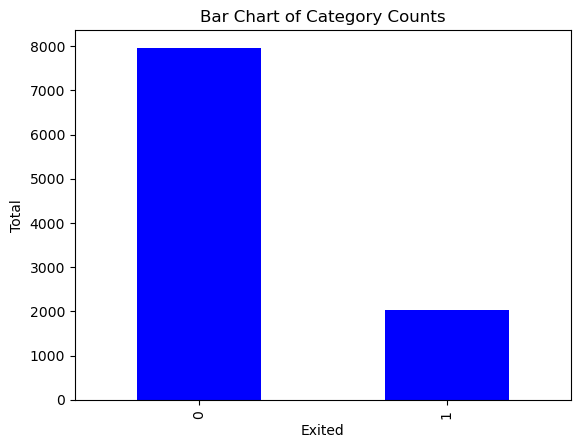

In [4]:
category_counts = dataset['Exited'].value_counts()
category_counts.plot(kind='bar', color='blue')

plt.xlabel('Exited')
plt.ylabel('Total')
plt.title('Bar Chart of Category Counts')

plt.show()

Undersampling the Majority class

In [5]:
def perform_random_undersampling(data, majority_class_value, undersample_size, random_state=42):

    # Separate the majority and minority classes
    majority_class = data[data['Exited'] == majority_class_value]
    minority_class = data[data['Exited'] != majority_class_value]

    # Randomly select a subset from the majority class
    undersampled_majority = majority_class.sample(
        n=undersample_size, random_state=random_state)

    # Concatenate the undersampled majority class with the minority class
    balanced_data = pd.concat([undersampled_majority, minority_class])

    # Shuffle the combined dataset
    balanced_data = balanced_data.sample(
        frac=1, random_state=random_state).reset_index(drop=True)

    return balanced_data


balanced_data = perform_random_undersampling(
    dataset, majority_class_value=0, undersample_size=6000)
balanced_data.shape

(8037, 14)

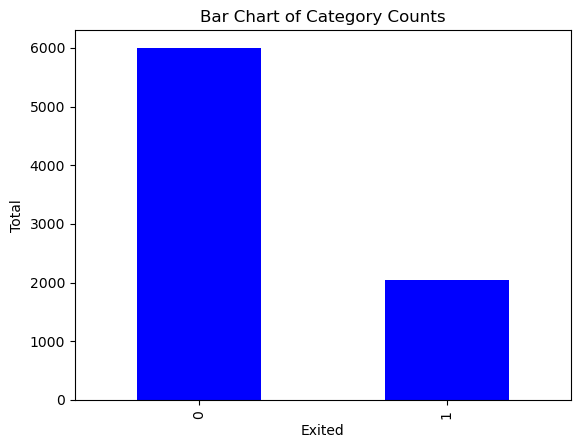

In [6]:
category_counts = balanced_data['Exited'].value_counts()
category_counts.plot(kind='bar', color='blue')

plt.xlabel('Exited')
plt.ylabel('Total')
plt.title('Bar Chart of Category Counts')

plt.show()

In [7]:
X = balanced_data.iloc[:,3:13].values
y = balanced_data.iloc[:,13].values

In [8]:
X,y

(array([[791, 'France', 'Female', ..., 1, 1, 123977.86],
        [602, 'France', 'Male', ..., 0, 1, 180716.1],
        [601, 'Germany', 'Male', ..., 0, 1, 41816.49],
        ...,
        [656, 'Spain', 'Male', ..., 1, 1, 197961.93],
        [764, 'Germany', 'Male', ..., 1, 0, 166324.79],
        [736, 'Germany', 'Male', ..., 1, 0, 185360.4]], dtype=object),
 array([1, 1, 1, ..., 0, 1, 1]))

Encoding The Independent Categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lableencoder_X_1 = LabelEncoder()
X[:, 1] = lableencoder_X_1.fit_transform(X[:, 1])
lableencoder_X_2 = LabelEncoder()
X[:, 2] = lableencoder_X_2.fit_transform(X[:, 2])
X

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[791, 0, 0, ..., 1, 1, 123977.86],
       [602, 0, 1, ..., 0, 1, 180716.1],
       [601, 1, 1, ..., 0, 1, 41816.49],
       ...,
       [656, 2, 1, ..., 1, 1, 197961.93],
       [764, 1, 1, ..., 1, 0, 166324.79],
       [736, 1, 1, ..., 1, 0, 185360.4]], dtype=object)

One hot Encoding the categorical values

In [10]:
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    [("one_hot_encoder", OneHotEncoder(), [1])],
    remainder="passthrough"
)

X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 123977.86],
       [1.0, 0.0, 0.0, ..., 0, 1, 180716.1],
       [0.0, 1.0, 0.0, ..., 0, 1, 41816.49],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 1, 197961.93],
       [0.0, 1.0, 0.0, ..., 1, 0, 166324.79],
       [0.0, 1.0, 0.0, ..., 1, 0, 185360.4]], dtype=object)

Leaving one dummy variables for better performance

In [11]:
X = X[:,1:]
X

array([[0.0, 0.0, 791, ..., 1, 1, 123977.86],
       [0.0, 0.0, 602, ..., 0, 1, 180716.1],
       [1.0, 0.0, 601, ..., 0, 1, 41816.49],
       ...,
       [0.0, 1.0, 656, ..., 1, 1, 197961.93],
       [1.0, 0.0, 764, ..., 1, 0, 166324.79],
       [1.0, 0.0, 736, ..., 1, 0, 185360.4]], dtype=object)

Splitting the dataset into Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
y_train

array([0, 0, 0, ..., 0, 1, 0])

Feature scaling 


In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train  = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)
X_train.shape

(6429, 11)

# XGBoost Classifier

In [14]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
model = classifier_xgb.fit(X_train,y_train)
y_pred_xgb = model.predict(X_test)
y_pred_xgb

array([1, 0, 1, ..., 0, 1, 0])

Cross validation for XGBoost Classifier

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


accuracies = cross_val_score(estimator=classifier_xgb,X=X_train,y=y_train,cv=10)


print("10 Fold Cross Validation Accuracy on Training set: {:.2f} %".format(accuracies.mean()*100))
print("CV Standard Deviation: {:.2f} %".format(accuracies.std()*100))
acc_xgb = accuracy_score(y_true=y_test,y_pred=y_pred_xgb)
print("Accuracy on Test set: {:.2f} %".format(acc_xgb*100))

10 Fold Cross Validation Accuracy on Training set: 82.98 %
CV Standard Deviation: 0.76 %
Accuracy on Test set: 83.46 %


# Neural Network Classifier

Importing the Keras libraries and packages

In [16]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Making the model

In [17]:
classifier_ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Compiling the ANN

In [18]:
classifier_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the ANN to the training set

In [19]:
X_train_tensor = tf.constant(X_train,dtype=tf.float64)
X_test_tensor = tf.constant(X_test,dtype=tf.float64)
y_train_tensor = tf.constant(y_train,dtype=tf.float64)
y_test_tensor = tf.constant(y_test,dtype=tf.float64)

history = classifier_ann.fit(X_train_tensor, y_train_tensor,batch_size=10,epochs=20)

Epoch 1/20
643/643 [==============================] - 2s 2ms/step - loss: 0.4446 - accuracy: 0.8046
Epoch 2/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3831 - accuracy: 0.8343
Epoch 3/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8373
Epoch 4/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8407
Epoch 5/20
643/643 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8443
Epoch 6/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8460
Epoch 7/20
643/643 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.8496
Epoch 8/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8516
Epoch 9/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8480
Epoch 10/20
643/643 [==============================] - 1s 2ms/step - loss: 0.3391 - accuracy: 0.8536

# Part Three

Predicting the Test set results

In [20]:
y_pred_ann = classifier_ann.predict(X_test_tensor)
y_pred_ann = (y_pred_ann>0.9)
y_pred_ann = tf.constant(y_pred_ann,dtype=tf.float64)
y_pred_ann

51/51 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(1608, 1), dtype=float64, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])>

Analysis of metrics

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score,f1_score


def evaluate_and_visualize_confusion_matrix(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return precision, recall,f1


precision_xgb, recall_xgb,f1_xgb = evaluate_and_visualize_confusion_matrix(y_test, y_pred_xgb)
precision_ann, recall_ann,f1_ann = evaluate_and_visualize_confusion_matrix(y_test_tensor, y_pred_ann)
acc_ann = history.history['accuracy'][-1]

print(
    f"Precision of XGBoost Classifier: {round(precision_xgb,2)*100} % , NN classifier: {round(precision_ann,2)*100} %  ")
print(
    f"Recall of XGBoost Classifier: {round(recall_xgb,2)*100} % , NN classifier: {round(recall_ann,2)*100} %  ")
print(
    f"F1 score of XGBoost Classifier: {round(f1_xgb,2)*100} % , NN classifier: {round(f1_ann,2)*100} %  ")
print(
    f"Accuracy on test set of XGBoost Classifier: {round(acc_xgb,2)*100} % , NN classifier: {round(acc_ann,2)*100} %  ")


Precision of XGBoost Classifier: 75.0 % , NN classifier: 87.0 %  
Recall of XGBoost Classifier: 53.0 % , NN classifier: 24.0 %  
F1 score of XGBoost Classifier: 62.0 % , NN classifier: 38.0 %  
Accuracy on test set of XGBoost Classifier: 83.0 % , NN classifier: 88.0 %  
